# Motorcycle Classification

Autor: Nossair Ghazouani


## Obtenció de les dades:

S'ha fet servir el motor de cerca bing, utilitzant una [llibreria](https://github.com/ostrolucky/Bulk-Bing-Image-downloader) implementada expressament per l'obtenció de les diferents dades.

> NOTA: S'han intentat fer servir altres tècniques o buscar datasets ja preparats però ha sigut impossible.

### Instal·lació i instancia d'elles.

In [4]:
!pip install git+https://github.com/ostrolucky/Bulk-Bing-Image-downloader

  Cloning https://github.com/ostrolucky/Bulk-Bing-Image-downloader to c:\users\nghaz\appdata\local\temp\pip-req-build-3el1yqte
  Resolved https://github.com/ostrolucky/Bulk-Bing-Image-downloader to commit bb938f19a2c59841dedbc6e5515a061751af748c
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/ostrolucky/Bulk-Bing-Image-downloader 'C:\Users\nghaz\AppData\Local\Temp\pip-req-build-3el1yqte'


De moment s'ha fet una prova amb un llistat de marques:

- Honda
- Kawasaki
- Yamaha
- Ktm
- Bmw

In [9]:
content_dir = './data/motorcycle_data/'
brands = ['honda', 'kawasaki', 'yamaha', 'ktm', 'bmw']
site = "site:totalmotorcycle.com"

for brand in brands:
  name_brand = brand + " " + site
  !python bbid.py {name_brand} -o {content_dir + 'Train/' + brand} --limit 1000
  !python bbid.py {name_brand} -o {content_dir + 'Validate/' + brand} --limit 1000

{'search_string': ['honda', 'site:totalmotorcycle.com'], 'search_file': False, 'output': './data/motorcycle_data/Train/honda', 'adult_filter_off': False, 'filters': '', 'limit': 1000, 'threads': 20}
 OK : 2021-Honda-CB1000R3.jpg
 OK : 2020-Honda-Grom1.jpg
 OK : 2021-Honda-CBR600RR-ABS2.jpg
 OK : CB1000R-‘Dani-Pedrosa-replica’.jpg
 OK : 2021-Honda-Rebel-300a.jpg
 OK : 2019-Honda-CRF250F4.jpg
 OK : 2019-Honda-CBR300R-ABS1.jpg
 OK : 2020-Honda-CRF250R1.jpg
 OK : 2021-Honda-CBR600RR-ABS1.jpg
 OK : 2018-Honda-CBR500R-ABS1.jpg
 OK : 2022-Honda-CB500F-ABS2-1536x1152.jpg
 OK : 2021-Honda-Gold-Wing-Tour-DCT-Airbag.jpg
 OK : 2018-Honda-CRF250R4.jpg
SKIP: Already checked url, skipping
SKIP: Already checked url, skipping
 OK : 2013-Honda-FourTrax-Rancher4x4-TRX42.jpg
 OK : 2021-Honda-Gold-Wing-Tour-DCT-Airbag-1.jpg
 OK : 2021-Honda-CRF300L4.jpg
 OK : 2011-Honda-CBR250Ra.jpg
 OK : 2021-Honda-CBR600RR-ABS3.jpg
 OK : 2021-Honda-CB1000R4.jpg
 OK : 2016-Honda-CRF450R2.jpg
 OK : 2021-Honda-NC750X3.jpg
 


 OK : 2021-BMW-K1600B2.jpg
 OK : 2020-BMW-S1000XR4-1024x678.jpg
 OK : 2021-BMW-F850GS-Adventure2.jpg
 OK : 2013-BMW-G650GS2-small.jpg
 OK : 2021-BMW-F850GS-Adventure1.jpg
 OK : 2019-BMW-K1600GT1-1024x724.jpg
 OK : 2018-BMW-9cento-Concept2-1024x682.jpg
 OK : 2021-BMW-R1250R3.jpg
 OK : 2009-BMW-S1000RR-Prototypeg.jpg
 OK : 2021-BMW-F850GS-Adventure-Edition-40-1.jpg
 OK : 2021-BMW-F750GS-Edition-40b.jpg
 OK : 2022-BMW-F900XR2.jpg
 OK : 2020-BMW-C650GT3-1024x767.jpg
 OK : 2021-BMW-S1000R9-768x543.jpg
 OK : 2020-BMW-F900R6-1024x724.jpg
 OK : 2021-BMW-R-nineT5-1024x683.jpg
 OK : 2022-BMW-R1250GS-Adventure4.jpg
 OK : 2015-BMW-R1200GS2.jpg
SKIP: Already checked url, skipping
SKIP: Already checked url, skipping
SKIP: Already checked url, skipping
SKIP: Already checked url, skipping
SKIP: Already checked url, skipping
SKIP: Already checked url, skipping
SKIP: Already checked url, skipping
SKIP: Already checked url, skipping
 OK : 2010-BMW-F800Rb.jpg
 OK : 2008-BMW-F800GSb.jpg
SKIP: Already chec

## Model CNN ResNet50

A continuació un cop tenim les dades procedim a realitzar el nostre model.

In [14]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob 
import matplotlib.pyplot as plt 

In [15]:
IMAGE_SIZE = [224,224]

TrainFolder = content_dir + "/Train"
ValidateFolder = content_dir + "/Validate"

myResnet = ResNet50(input_shape= IMAGE_SIZE+[3] , weights='imagenet', include_top=False )

94765736/94765736 [==============================] - 2s 0us/step


In [16]:
# No es fa falta entrenar el nostre model ja està entrenat.

for layer in myResnet.layers:
    layer.trainable = False

In [17]:
Classes = glob(TrainFolder + '/*')
print(Classes)

classesNum = len(Classes)
print(classesNum)

['./data/motorcycle_data//Train\\bmw', './data/motorcycle_data//Train\\honda', './data/motorcycle_data//Train\\kawasaki', './data/motorcycle_data//Train\\ktm', './data/motorcycle_data//Train\\yamaha']
5


In [18]:
PlusFlattenlayer = Flatten()(myResnet.output)

# add a Dense layer with our classes 
prediction = Dense(classesNum, activation='softmax')(PlusFlattenlayer)

In [19]:
model = Model(inputs=myResnet.input , outputs=prediction)

In [20]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1. /255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. /255)

training_set = train_datagen.flow_from_directory(TrainFolder, target_size=(224,224),batch_size=32,class_mode='categorical')
test_set = test_datagen.flow_from_directory(ValidateFolder,target_size=(224,224),batch_size=32,class_mode='categorical')

# fit the model
result = model.fit(training_set ,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set))

Found 3262 images belonging to 5 classes.
Found 2784 images belonging to 5 classes.
Epoch 1/5
102/102 [==============================] - 655s 6s/step - loss: 3.5014 - accuracy: 0.3007 - val_loss: 1.1915 - val_accuracy: 0.5136
Epoch 2/5
102/102 [==============================] - 636s 6s/step - loss: 1.8952 - accuracy: 0.3694 - val_loss: 2.2279 - val_accuracy: 0.4027
Epoch 3/5
102/102 [==============================] - 636s 6s/step - loss: 1.7798 - accuracy: 0.4227 - val_loss: 1.1026 - val_accuracy: 0.5898
Epoch 4/5
102/102 [==============================] - 676s 7s/step - loss: 1.4152 - accuracy: 0.4822 - val_loss: 1.2381 - val_accuracy: 0.5291
Epoch 5/5
102/102 [==============================] - 684s 7s/step - loss: 1.3415 - accuracy: 0.5058 - val_loss: 0.9418 - val_accuracy: 0.6440


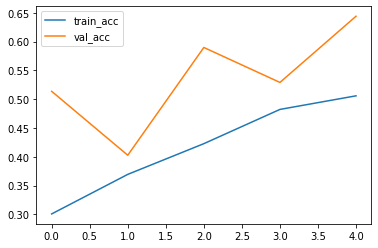

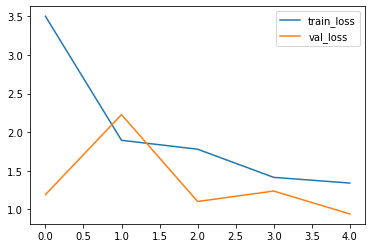

In [23]:
# plot the accuracy
plt.plot(result.history['accuracy'],label='train_acc')
plt.plot(result.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

#plot the loss
plt.plot(result.history['loss'],label='train_loss')
plt.plot(result.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

# save the model
model.save('./data/MotorCycleModel.h5')

## Proves

Un cop tenim el nostre model entrenat farem un parell de proves per veure que el seu funcionament es correcte.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model

!pip install opencv-python --user
import cv2

from keras.preprocessing import image
from tensorflow.keras.utils import load_img , img_to_array
import numpy as np

In [2]:
model = tf.keras.models.load_model('./data/MotorCycleModel.h5')

In [3]:
def preprareImage(PathForImage):
    image = load_img(PathForImage, target_size=(224,224))
    imgResult = img_to_array(image)
    imgResult = np.expand_dims(imgResult, axis = 0)
    imgResult = imgResult / 255.
    return imgResult

In [4]:
brands = ['bmw', 'honda', 'kawasaki', 'ktm', 'yamaha']

In [23]:
import glob

testDirectory = './data/motorcycle_data/Test'
testImages = glob.glob(testDirectory + '/*')

"""
Bucle per cada imatge i mostrar-la amb el cv2
"""
for testImage in testImages:
    imgResult = preprareImage(testImage)
    prediction = model.predict(imgResult)
    print(prediction)
    print(brands[np.argmax(prediction)])
    img = cv2.imread(testImage)
    cv2.putText(img, brands[np.argmax(prediction)], (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.putText(img, str(np.max(prediction)), (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.imshow('image', img)
    cv2.waitKey(0)


1/1 [==============================] - 0s 124ms/step
[[0.0483804  0.10922882 0.05981017 0.05502053 0.7275601 ]]
yamaha
1/1 [==============================] - 0s 180ms/step
[[0.01643918 0.0042131  0.9196727  0.05437499 0.00530006]]
kawasaki
1/1 [==============================] - 0s 136ms/step
[[0.00557298 0.7633485  0.04286845 0.00210217 0.18610784]]
honda
1/1 [==============================] - 0s 178ms/step
[[0.07928696 0.09855609 0.13573647 0.44862226 0.23779818]]
ktm
1/1 [==============================] - 0s 187ms/step
[[0.62212116 0.30359954 0.01461171 0.0027647  0.0569029 ]]
bmw
1/1 [==============================] - 0s 145ms/step
[[0.02196364 0.94470465 0.01038133 0.0019963  0.02095405]]
honda
